In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris_data = pd.read_csv("iris.csv")

In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

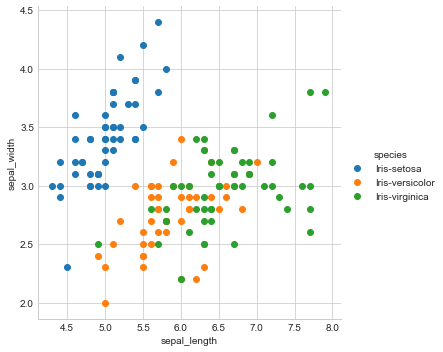

In [58]:
import seaborn as sns
sns.FacetGrid(iris_data,hue="species",size=5) \
.map(plt.scatter,"sepal_length","sepal_width") \
.add_legend()
plt.show()  

In [50]:
print(iris_data.iloc[:5,[0]].values)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]]


In [9]:
iris_data.shape

(150, 5)

In [5]:
iris_data.species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [10]:
X = iris_data.iloc[:,[0,1,2,3]].values

In [11]:
X.shape

(150, 4)

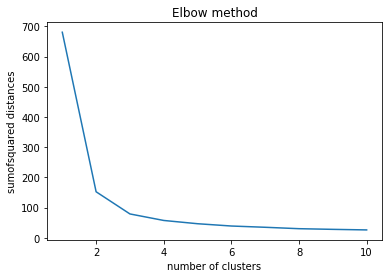

In [18]:
from sklearn.cluster import KMeans
sumofsquaredist = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    sumofsquaredist.append(kmeans.inertia_)
plt.plot(range(1,11),sumofsquaredist)
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("sumofsquared distances")
plt.show()

In [60]:
kmeans = KMeans(n_clusters = 3)
labels = kmeans.fit_predict(X)

In [61]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [62]:
centroids = kmeans.cluster_centers_

In [63]:
print(centroids)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [64]:
X[labels == 0, 0]

array([7. , 6.4, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1,
       5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 5.8, 4.9, 5.7, 5.8,
       6. , 5.6, 6.3, 6.2, 6.1, 6.3, 6. , 5.8, 6.3, 5.9])

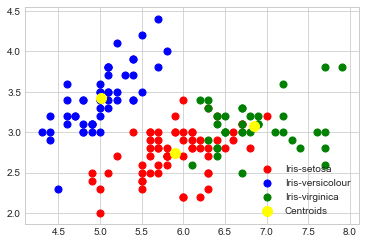

In [65]:
#Visualising the clusters
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [68]:
from sklearn.cluster import AgglomerativeClustering
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_clust.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [70]:
agg_clust.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [71]:
agg_clust.cluster_centers_

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

In [67]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
 
image = io.imread('tiger.png')
io.imshow(image)
io.show()
 
rows = image.shape[0]
cols = image.shape[1]
  
image = image.reshape(image.shape[0]*image.shape[1],3)
kmeans = KMeans(n_clusters = 128, n_init=10, max_iter=200)
kmeans.fit(image)
 
clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(rows,cols); 
 
np.save('codebook_tiger.npy',clusters)    
io.imsave('compressed_tiger.png',labels);

ImportError: cannot import name '_validate_lengths'